# Числа Фибоначчи. Наивный и улучшенный алгоритмы

In [46]:
def fib(n):
    fibs = [0 if i != 1 else 1 for i in range(n+1)]
    for i in range(2, n+1):
        fibs[i] = fibs[i-1] + fibs[i-2]
    return fibs[n]
fib(100)



def fib_fast(n):
    f0, f1 = 0, 1
    for i in range(n-1):
        f0, f1 = f1, f0 + f1
    return f1
fib_fast(8)

21

# Последняя цифра числа Фибоначчи

In [17]:
def fib(n):
    fibs = [0 if i != 1 else 1 for i in range(n+1)]
    for i in range(2, n+1):
        fibs[i] = (fibs[i-1] + fibs[i-2]) % 10
    return fibs[n]
fib(10)

5

# Период Пизано и остаток деления числа Фибоначчи

In [31]:
def Pizano(m):
    fibs = [0, 1]
    for i in range(2, 6*m):
        fibs.append((fibs[i-1] + fibs[i-2]) % m)
        if fibs[i] == 1 and fibs[i-1] == 0:
            return fibs
            
        
def fib(n, m):
    x = Pizano(m)
    return x[n % (len(x) - 2)]
    
fib(10, 5)

0

# Алгоритм Евклида

In [101]:
def gcd(a, b):
    if a == 0 or b == 0:
        return a + b
    if a > b:
        return gcd(a % b, b)
    return gcd(b % a, a)

def gcd_2(a, b):
    while a and b:
        if a > b:
            a %= b
        else:
            b %= a
    return a+b

In [87]:
import time 

def timed(f, *args, n_iter=100):
    acc = float('inf')
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc

In [58]:
print(timed(fib, 8000), timed(fib_fast, 8000))

0.0024010999986785464 0.0009534999990137294


In [96]:
%matplotlib inline
from matplotlib import pyplot as plt

def compare(fs, args):
    for f in fs:
        plt.plot(args, [timed(f, arg) for arg in args], label=f.__name__)
        plt.legend()
        plt.grid(True)

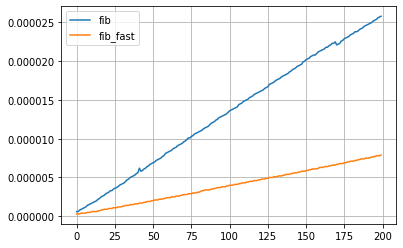

In [97]:
compare([fib, fib_fast], list(range(200)))

# Задача на программирование: покрыть отрезки точками
### По данным n отрезкам необходимо найти множество точек минимального размера, для которого каждый из отрезков содержит хотя бы одну из точек.

### В первой строке дано число 1≤n≤100 отрезков. Каждая из последующих n строк содержит по два числа 0≤l≤r≤109, задающих начало и конец отрезка. Выведите оптимальное число m точек и сами m точек. Если таких множеств точек несколько, выведите любое из них.

In [1]:
def checked(sets):
    result = []
    while sets:
        result.append(sets[0][1])
        sets = list(filter( lambda x: x[0] > result[len(result) - 1], sets))
    return list(map(str,result))

In [ ]:
import string
import sys

def main():
    input = sys.stdin
    n = int(input.readline())
    S = []
    for i in range(1,n+1):
        x,y = map(int, input.readline().split())
        S.append([x,y])
        S.sort(key = lambda x: x[1])
    x = checked(S)
    
        
    print(str(len(x))+'\n'+' '.join(x))
        
if __name__ == "__main__":
    main()